<a href="https://colab.research.google.com/github/Jodavid/Semana_Academica_UFPR/blob/main/Minicurso_Estat%C3%ADstica_Descritiva_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----
# Semana Acadêmica de Estatística da UFPR

## **Notebook criadao para o Minicurso**: Análise Exploratória com Python


O Objetivo do Notebook abaixo é mostrar uma Análise Exploratória de dados utilizando python.

Foi abordado métricas estatísticas como:
* Medidas de tendência central;
* Medidas de dispersão;
* Gráficos;
* Correlação;
* Testes Qui-Quadrados;

Com as análises acima, conseguimos ter uma ideia e retirar insights de nossos dados, que neste caso foi utilizado um banco de dados da Kaggle.

----

In [ ]:
# -----------------
# Bibliotecas necessarias para Analise dos Dados
import pandas as pd
import numpy as np
import scipy as sp

# Bibliotecas Gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------

# -----------------
import plotly.express as px
# -----------------

Base de dados: CARS4U

Link: https://www.kaggle.com/datasets/sukhmanibedi/cars4u

* id: Número único por linha para representar cada observação;
* nome: Nome do carro usado
* localizacao: Cidade de localização do carro na Índia
* ano: Ano de fabricação do carro
* quilometros_percorridos: Quilômetros percorridos pelo carro em km
* tipo_de_combustivel: Tipo de combustível utilizado pelo carro
* transmissao: Transmissão do carro
* tipo_proprietario: Quantos donos o carro já possuiu
* quilometragem_por_litro: Quantos km o carro faz com 1 lt
* motor: Quantidade de cilindradas do motor
* potencia: Potência do motor em bhp
* assentos: Quantidade de assentos do carro
* novo_preco: Variável que possui um preço do carro em Lakh
* preco: Variável que possui preco do carro também em Lakh

In [ ]:
# -----------------
# Lendo a Base de dados
#dados = pd.read_csv("/content/dataset/used_cars_data.csv")
dados = pd.read_csv("/content/used_cars_data.csv")
# -----------------

In [ ]:
# -----------------
# Visualizando um cabeçalho dos dados
dados.head(5)
# -----------------

,id,nome,localizacao,ano,quilometros_percorridos,tipo_de_combustivel,transmissao,tipo_proprietario,quilometragem_por_litro,motor,potencia,assentos,novo_preco,preco
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
# -----------------
# Visualizando os últimos dos dados
dados.tail(2)
# -----------------

,id,nome,localizacao,ano,quilometros_percorridos,tipo_de_combustivel,transmissao,tipo_proprietario,quilometragem_por_litro,motor,potencia,assentos,novo_preco,preco
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
# -----------------
# Visualizando Informações das colunas
dados.info()
# -----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7253 non-null   int64  
 1   nome                     7253 non-null   object 
 2   localizacao              7253 non-null   object 
 3   ano                      7253 non-null   int64  
 4   quilometros_percorridos  7253 non-null   int64  
 5   tipo_de_combustivel      7253 non-null   object 
 6   transmissao              7253 non-null   object 
 7   tipo_proprietario        7253 non-null   object 
 8   quilometragem_por_litro  7251 non-null   object 
 9   motor                    7207 non-null   object 
 10  potencia                 7207 non-null   object 
 11  assentos                 7200 non-null   float64
 12  novo_preco               1006 non-null   object 
 13  preco                    6019 non-null   float64
dtypes: float64(2), int64(3),

In [ ]:
# -----------------
# Visualizando Quantidades de Linhas e colunas
len(dados)
# -----------------
print("A quantidade de linhas da base são: " + str(len(dados)) )
# -----------------

A quantidade de linhas da base são: 7253


In [ ]:
# -----------------
len(dados.columns)
# -----------------
print("A quantidade de colunas da base são: " + str(len(dados.columns)) )
# -----------------

A quantidade de colunas da base são: 14


In [ ]:
# -----------------
dados.shape
# -----------------

(7253, 14)

In [ ]:
# -----------------
# Chegcando dados únicos por variável
dados.nunique()
# -----------------

id                         7253
nome                       2041
localizacao                  11
ano                          23
quilometros_percorridos    3660
tipo_de_combustivel           5
transmissao                   2
tipo_proprietario             4
quilometragem_por_litro     450
motor                       150
potencia                    386
assentos                      9
novo_preco                  625
preco                      1373
dtype: int64

In [ ]:
# -----------------
# Checando variáveis que possuem dados ausentes
dados.isnull().sum()
# -----------------

id                            0
nome                          0
localizacao                   0
ano                           0
quilometros_percorridos       0
tipo_de_combustivel           0
transmissao                   0
tipo_proprietario             0
quilometragem_por_litro       2
motor                        46
potencia                     46
assentos                     53
novo_preco                 6247
preco                      1234
dtype: int64

In [ ]:
# -----------------
# Remover coluna 'id' dos dados
dados = dados.drop(['id'], axis = 1)
dados.info()
# -----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nome                     7253 non-null   object 
 1   localizacao              7253 non-null   object 
 2   ano                      7253 non-null   int64  
 3   quilometros_percorridos  7253 non-null   int64  
 4   tipo_de_combustivel      7253 non-null   object 
 5   transmissao              7253 non-null   object 
 6   tipo_proprietario        7253 non-null   object 
 7   quilometragem_por_litro  7251 non-null   object 
 8   motor                    7207 non-null   object 
 9   potencia                 7207 non-null   object 
 10  assentos                 7200 non-null   float64
 11  novo_preco               1006 non-null   object 
 12  preco                    6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
# # -----------------
# # Remover coluna 'id' dos dados
# dados = dados.drop(columns = ['id'])
# dados.info()
# # -----------------

### Métricas Estatísticas

In [ ]:
# -----------------
dados.describe().T
# -----------------


,count,mean,std,min,25%,50%,75%,max
ano,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
quilometros_percorridos,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
assentos,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
preco,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [ ]:
# -----------------
dados.describe(include='all').T
# -----------------

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
nome,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localizacao,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ano,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
quilometros_percorridos,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
tipo_de_combustivel,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmissao,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_proprietario,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quilometragem_por_litro,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
motor,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
potencia,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculando Média de diferentes formas:


#### Usando Pandas com determinada coluna

In [ ]:
# Média
# -----------------
print(dados["preco"].mean()) #Pandas
# -----------------
print(np.mean(dados["preco"])) #Numpy
# -----------------
sp.mean(dados["preco"]) #Scipy

9.47946835022429
9.47946835022429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  import sys


9.47946835022429

In [ ]:
# Min
# -----------------
dados["preco"].min() #Pandas
# -----------------
np.min(dados["preco"]) #Numpy
# -----------------

0.44

In [ ]:
# Máx
# -----------------
print(dados["preco"].max()) #Pandas
# -----------------
np.max(dados["preco"]) #Numpy
# -----------------

160.0


160.0

In [ ]:
# Quantis
# -----------------
dados["preco"].quantile() #Pandas
# -----------------

5.64

In [ ]:
# Quantis
# -----------------
dados["preco"].median() #Pandas
# -----------------

5.64

In [ ]:
# -----------------
# Quantil 'nan'
np.quantile(dados["preco"], 0.5) #Numpy
# -----------------

nan

In [ ]:
# -----------------
# Alternativa
np.nanquantile(dados["preco"], 0.5) #Numpy
# -----------------

5.64

In [ ]:
# -----------------
np.nanquantile(dados["preco"], [0,0.25,0.5,0.75,1]) #Numpy
# -----------------

array([  0.44,   3.5 ,   5.64,   9.95, 160.  ])

In [ ]:
# -----------------
# Quantis com Pandas
# -----------------
dados["preco"].quantile([0,0.25,0.5,0.75,1]) #Pandas
# -----------------

0.00      0.44
0.25      3.50
0.50      5.64
0.75      9.95
1.00    160.00
Name: preco, dtype: float64

In [ ]:
# -----------------
# Quantis para duas variáveis
# -----------------
dados[["quilometros_percorridos","preco"]].quantile([0,0.25,0.5,0.75,1]) #Pandas
# -----------------

,quilometros_percorridos,preco
0.00,171.0,0.44
0.25,34000.0,3.50
0.50,53416.0,5.64
0.75,73000.0,9.95
1.00,6500000.0,160.00


In [ ]:
# ---------------------
# Calculando Variância
dados.var()
# ---------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


ano                        1.059125e+01
quilometros_percorridos    7.128040e+09
assentos                   6.587914e-01
preco                      1.251695e+02
dtype: float64

In [ ]:
# ---------------------
# Calculando Covariância
dados.cov()
# ---------------------

,ano,quilometros_percorridos,assentos,preco
ano,10.591255,-5.161682e+04,0.021573,11.169366
quilometros_percorridos,-51616.822165,7.128040e+09,6201.221577,-11735.383472
assentos,0.021573,6.201222e+03,0.658791,0.473281
preco,11.169366,-1.173538e+04,0.473281,125.169489


In [ ]:
# ---------------------
# Calculando Correlação
dados.corr()
# ---------------------

,ano,quilometros_percorridos,assentos,preco
ano,1.000000,-0.187859,0.008216,0.305327
quilometros_percorridos,-0.187859,1.000000,0.090221,-0.011493
assentos,0.008216,0.090221,1.000000,0.052225
preco,0.305327,-0.011493,0.052225,1.000000


----

### Variáveis Qualitativas - Calculand Frequências

In [ ]:
# ---------------------
dados["nome"].value_counts()
# ---------------------

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: nome, Length: 2041, dtype: int64

In [ ]:
# ---------------------
dados.groupby(["nome"])["nome"] \
      .count() \
      .reset_index(name='count') \
      .sort_values(['count'], ascending=False)
# ---------------------

,nome,count
1017,Mahindra XUV500 W8 2WD,55
1265,Maruti Swift VDI,49
1241,Maruti Swift Dzire VDI,42
457,Honda City 1.5 S MT,39
1266,Maruti Swift VDI BSIV,37
...,...,...
939,Mahindra NuvoSport N8,1
937,Mahindra Logan Petrol 1.4 GLE,1
936,Mahindra Logan Diesel 1.5 DLS,1
935,Mahindra KUV 100 mFALCON G80 K8,1


#### Criando Tabelas Cruzadas

In [ ]:
tabela_cruzada = pd.crosstab(dados['transmissao'], dados['tipo_proprietario']) 
tabela_cruzada

tipo_proprietario,First,Fourth & Above,Second,Third
transmissao,,,,
Automatic,1682,1,332,34
Manual,4270,11,820,103


In [ ]:
chi2_contingency(tabela_cruzada)

(3.3292759948834876,
 0.34358871263824625,
 3,
 array([[1.68146257e+03, 3.39004550e+00, 3.25444368e+02, 3.87030194e+01],
        [4.27053743e+03, 8.60995450e+00, 8.26555632e+02, 9.82969806e+01]]))

In [ ]:
# ---------------------
# Teste de Qui-Quadrado
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Aplicando Teste Qui-Quadrado na Tabela. 
c, p, dof, expected = chi2_contingency(tabela_cruzada)
print(p)
# ---------------------

0.34358871263824625


In [ ]:
# ---------------------
# Teste de Qui-Quadrado com Transmissao e Localização
tabela_cruzada = pd.crosstab(dados['transmissao'], dados['localizacao']) 
# ---
c, p, dof, expected = chi2_contingency(tabela_cruzada)
print(p)
# ---------------------

1.3894902634085349e-55


In [ ]:
# ---------------------
# Tabela Cruzada para Transmissao e Localização
tabela_cruzada
# --------

localizacao,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
transmissao,,,,,,,,,,,
Automatic,72,179,136,303,204,232,62,245,88,359,169
Manual,203,261,455,469,456,644,437,527,566,590,596


In [ ]:
# ---------------------
# Tabela Esperanda para Transmissao e Localização
expected
# --------

array([[ 77.68854267, 124.30166828, 166.9597408 , 218.09292706,
        186.45250241, 247.47332138, 140.96939198, 218.09292706,
        184.75747966, 268.09609817, 216.11540052],
       [197.31145733, 315.69833172, 424.0402592 , 553.90707294,
        473.54749759, 628.52667862, 358.03060802, 553.90707294,
        469.24252034, 680.90390183, 548.88459948]])

Antes dos gráficos, vamos verificar quais variáveis são numéricas e quais são categóricas

In [ ]:
# -----------------
cat_cols = dados.select_dtypes(include=['object']).columns
num_cols = dados.select_dtypes(include=np.number).columns.tolist()
print("Variáveis Categóricas:" + str(cat_cols))
print("Variáveis Numéricas: " + str(num_cols))
# -----------------

Variáveis Categóricas:Index(['nome', 'localizacao', 'tipo_de_combustivel', 'transmissao',
       'tipo_proprietario', 'quilometragem_por_litro', 'motor', 'potencia',
       'novo_preco', 'marca'],
      dtype='object')
Variáveis Numéricas: ['ano', 'quilometros_percorridos', 'assentos', 'preco', 'idade_carro']


In [ ]:
# -----------------
# Criação da variável 'Car_Age'como uma novas variável
from datetime import date
# ---
print("O ano atual é: " + str(date.today().year) )
# --
dados['idade_carro'] = date.today().year - dados['ano']
# --
dados.head(2)
# -----------------

O ano atual é: 2022


,nome,localizacao,ano,quilometros_percorridos,tipo_de_combustivel,transmissao,tipo_proprietario,quilometragem_por_litro,motor,potencia,assentos,novo_preco,preco,idade_carro
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nome                     7253 non-null   object 
 1   localizacao              7253 non-null   object 
 2   ano                      7253 non-null   int64  
 3   quilometros_percorridos  7253 non-null   int64  
 4   tipo_de_combustivel      7253 non-null   object 
 5   transmissao              7253 non-null   object 
 6   tipo_proprietario        7253 non-null   object 
 7   quilometragem_por_litro  7251 non-null   object 
 8   motor                    7207 non-null   object 
 9   potencia                 7207 non-null   object 
 10  assentos                 7200 non-null   float64
 11  novo_preco               1006 non-null   object 
 12  preco                    6019 non-null   float64
 13  idade_carro              7253 non-null   int64  
dtypes: float64(2), int64(3),

In [ ]:
# -----------------
# Criação da variável 'Marca' do carro
# str.split: quebra as strings
# str.get(0): pega todas as posições 0 de cada lista criada da linha
dados['marca'] = dados["nome"].str.split().str.get(0)
# --
dados.head(2)
# -----------------

,nome,localizacao,ano,quilometros_percorridos,tipo_de_combustivel,transmissao,tipo_proprietario,quilometragem_por_litro,motor,potencia,assentos,novo_preco,preco,idade_carro,marca
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7,Hyundai


### EDA Análise Univariada

In [ ]:
num_cols

['ano', 'quilometros_percorridos', 'assentos', 'preco', 'idade_carro']

ano
Assimetria : -0.84


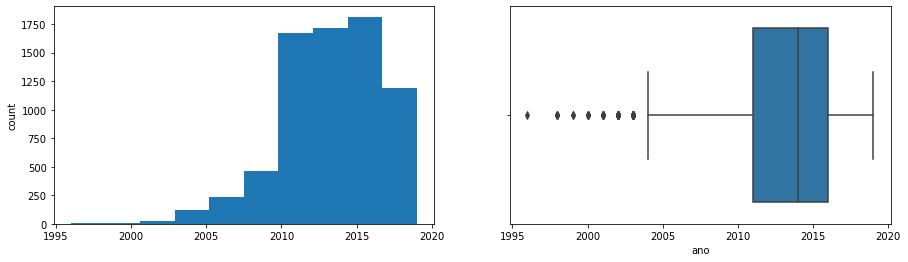

quilometros_percorridos
Assimetria : 61.58


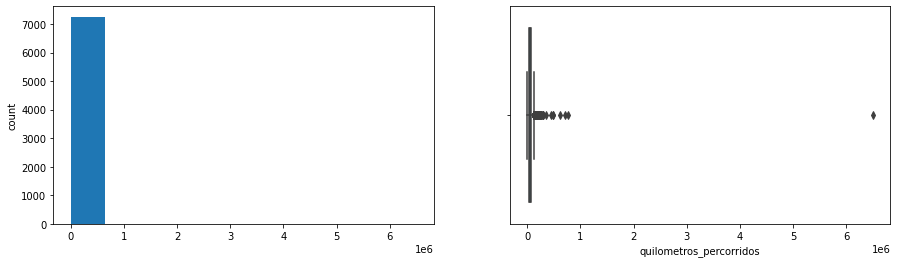

assentos
Assimetria : 1.9


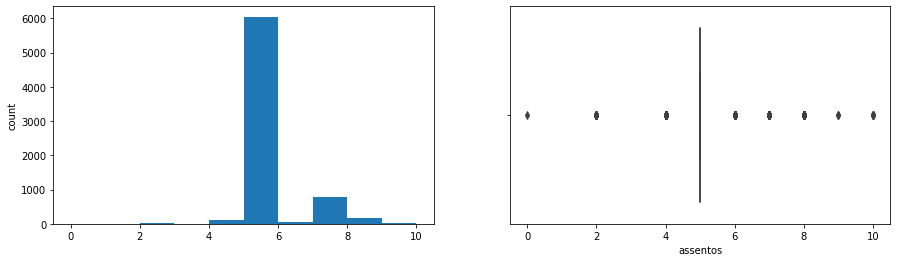

preco
Assimetria : 3.34


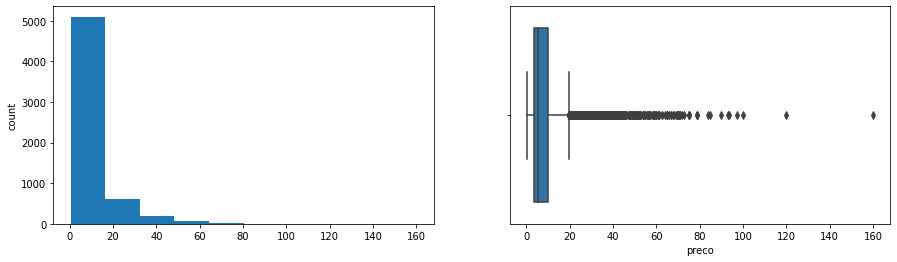

idade_carro
Assimetria : 0.84


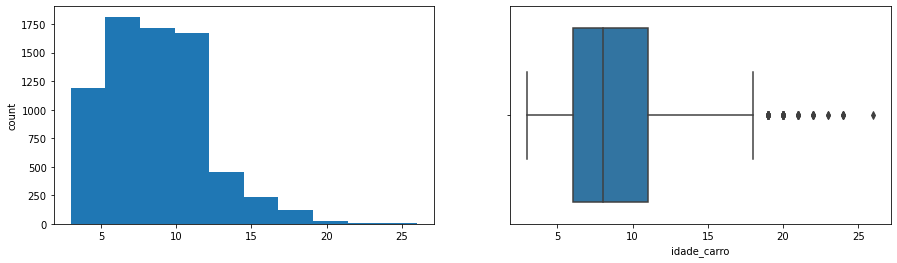

In [ ]:
# -----------------
for col in num_cols:
    print(col)
    print('Assimetria :', round(dados[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dados[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dados[col])
    plt.show()
# -----------------

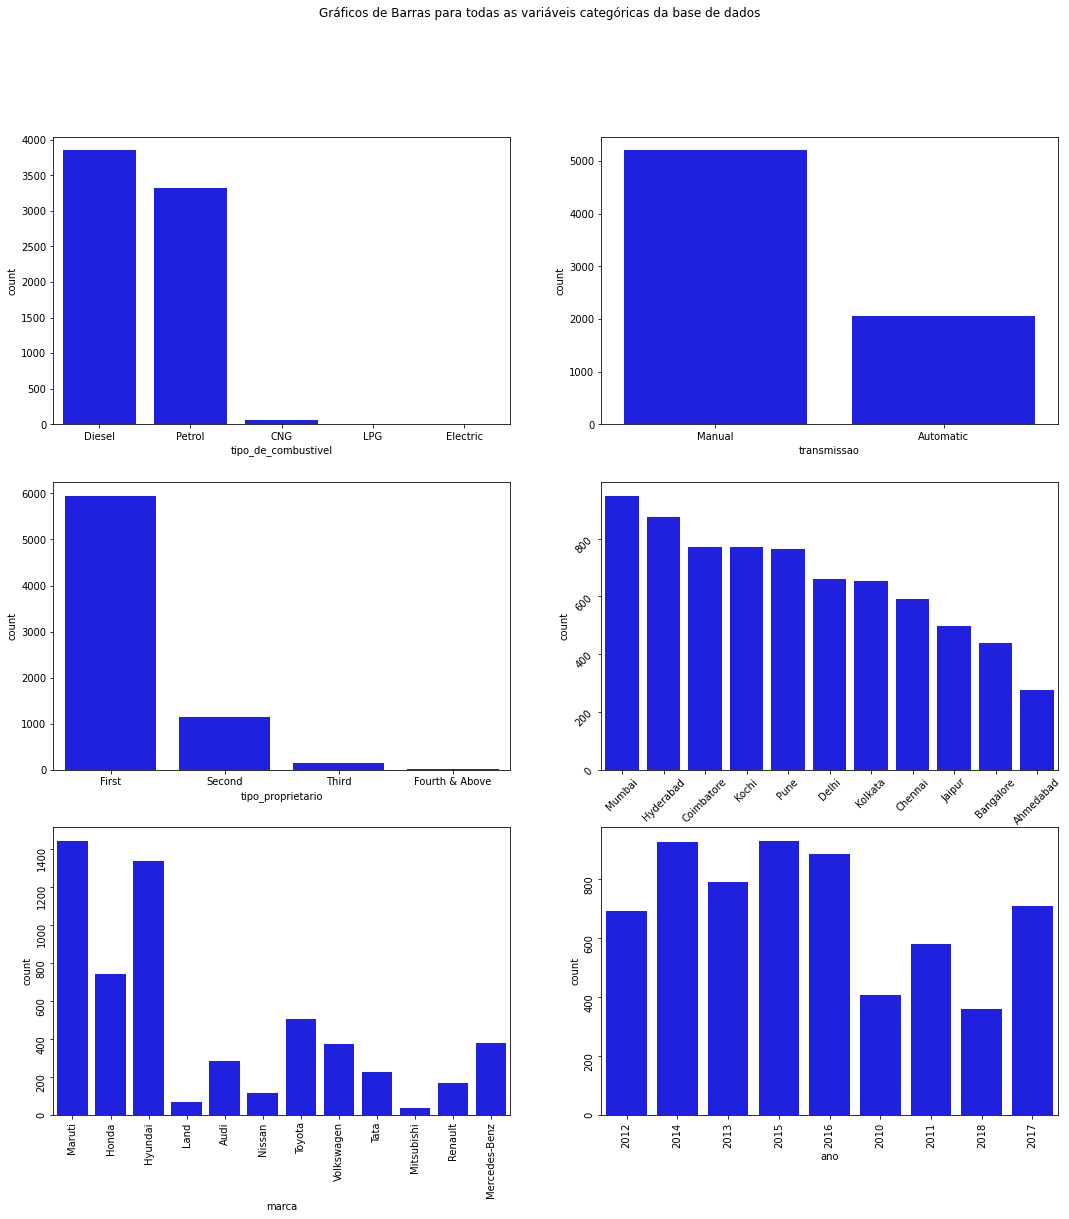

In [ ]:
# -----------------
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Gráficos de Barras para todas as variáveis categóricas da base de dados')
sns.countplot(ax = axes[0, 0], x = 'tipo_de_combustivel', data = dados, color = 'blue', 
              order = dados['tipo_de_combustivel'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'transmissao', data = dados, color = 'blue', 
              order = dados['transmissao'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'tipo_proprietario', data = dados, color = 'blue', 
              order = dados['tipo_proprietario'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'localizacao', data = dados, color = 'blue', 
              order = dados['localizacao'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'marca', data = dados, color = 'blue', 
              order = dados['marca'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'ano', data = dados, color = 'blue', 
              order = dados['ano'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
# -----------------

Análise Bivariada

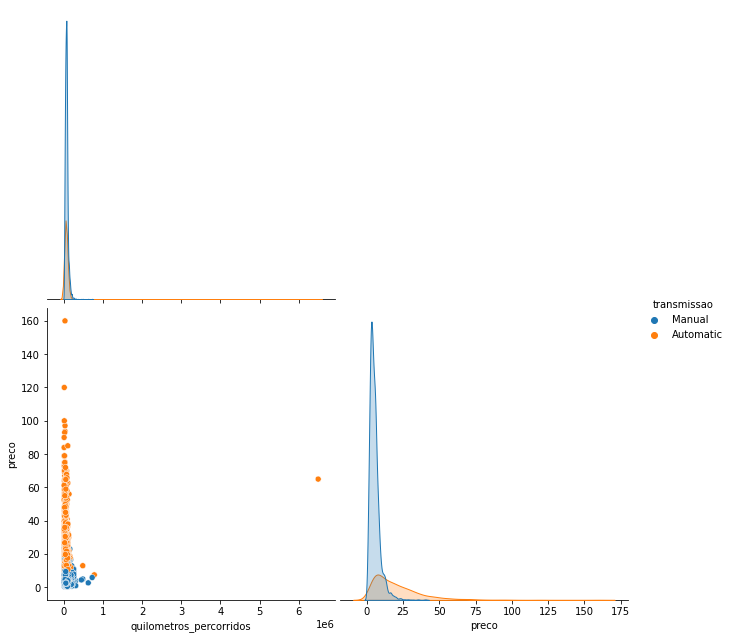

In [ ]:
# -----------------
sns.pairplot(data=dados[['quilometros_percorridos','preco','transmissao']], \
             height=4.5, \
             corner = True,\
             hue="transmissao")
# -----------------

### Gráficos de Barras entre variáveis categoricas e numéricas

In [ ]:
# #fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
# dados.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
# axarr[0][0].set_title("Location Vs Price", fontsize=18)
# dados.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
# axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
# dados.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
# axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
# dados.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
# axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
# dados.groupby('Marca')['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
# axarr[2][0].set_title("Marca Vs Price", fontsize=18)
# dados.groupby('Seats')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
# axarr[3][0].set_title("Seats Vs Price", fontsize=18)
# dados.groupby('Car_Age')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
# axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
# plt.subplots_adjust(hspace=1.0)
# plt.subplots_adjust(wspace=.5)

Text(0.5, 1.0, 'Transmissao Vs Preço')

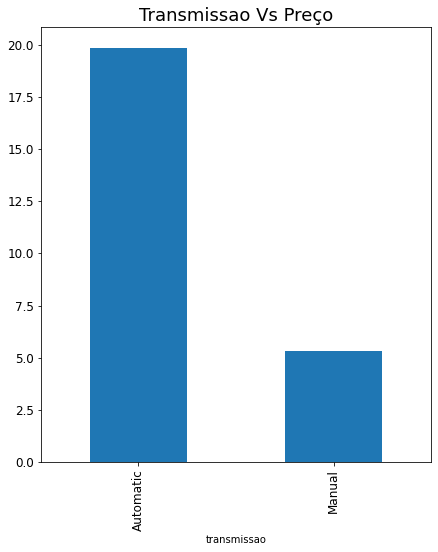

In [ ]:
fig, axarr = plt.subplots(1,1, figsize=(7, 8))
dados_agrupados = dados.groupby('transmissao')['preco'].mean().sort_values(ascending=False)
dados_agrupados.plot.bar(fontsize=12) \
  .set_title("Transmissao Vs Preço", fontsize=18)

In [ ]:
# -------------------
# Criando uma Tabela para geração do gráfico distinta por categorias
dfp = dados.pivot_table(index='ano', columns='transmissao', values='preco', aggfunc='mean')
# -------------------
dfp.head(10)
# -----------

transmissao,Automatic,Manual
ano,,
1998,3.900000,0.610000
1999,NaN,0.835000
2000,NaN,1.175000
2001,NaN,1.543750
2002,NaN,1.294000
2003,11.305000,1.258000
2004,3.931667,1.463600
2005,4.467778,1.569167
2006,10.853636,2.124925


Text(0.5, 1.0, 'Transmissao Vs Preço')

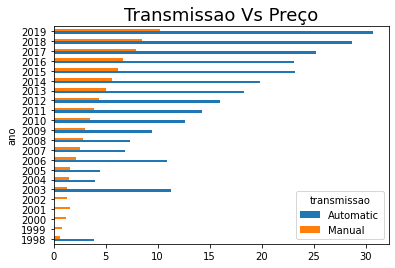

In [ ]:
dfp.plot.barh(fontsize=10, rot = 0) \
  .set_title("Transmissao Vs Preço", fontsize=18)

### OBS.: Lakh: Um laque equivale a cem mil

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nome                     7253 non-null   object 
 1   localizacao              7253 non-null   object 
 2   ano                      7253 non-null   int64  
 3   quilometros_percorridos  7253 non-null   int64  
 4   tipo_de_combustivel      7253 non-null   object 
 5   transmissao              7253 non-null   object 
 6   tipo_proprietario        7253 non-null   object 
 7   quilometragem_por_litro  7251 non-null   object 
 8   motor                    7207 non-null   object 
 9   potencia                 7207 non-null   object 
 10  assentos                 7200 non-null   float64
 11  novo_preco               1006 non-null   object 
 12  preco                    6019 non-null   float64
 13  idade_carro              7253 non-null   int64  
 14  marca                   

### HeatMap - Correlação Entre as variáveis numéricas

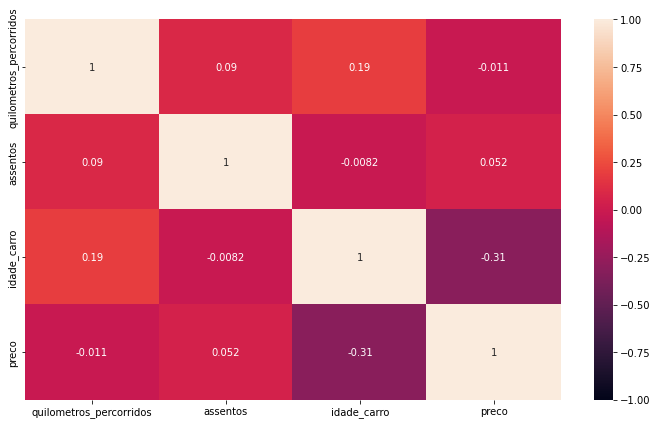

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(dados[['quilometros_percorridos','assentos', 'idade_carro','preco']].corr(), \
            annot = True, vmin = -1, vmax = 1)
plt.show()

----
### Um gráfico com plotly

In [ ]:
import plotly.express as px
# ------
dados_agrupados_p = dados_agrupados.reset_index(name = 'preco_medio')
# ------
fig = px.bar(dados_agrupados_p, x='transmissao', y = 'preco_medio')
fig.show()

----
### Um gráfico com plotnine

In [ ]:
from plotnine import ggplot, geom_bar, aes
# ------
dados_agrupados_p = dados_agrupados.reset_index(name = 'preco_medio')
# ------
ggplot(dados_agrupados_p, aes(x = 'transmissao', y = 'preco_medio')) \
+ geom_bar(stat = "identity")

-----

# Utilizando o 'sweetviz' para visualizar uma AED de forma automizada pelo python

In [ ]:
#Installing the library 
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ---------
# Importanto a biblioteca
import sweetviz as sv
# ---------
report = sv.analyze(dados)
report.show_html()
# ---------

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Algumas referências utilizadas

-   R para Data Science
-   Data Science do zero
-   Estatística e Ciêcia de Dados